# Kampus Merdeka 6: IBM & Skilvul
# Artificial Intelligence Phase Challenge

## Kelompok: 39
## Anggota

*   Muhammad Rizkan Harin Faza
*   Dicky Wijaya Saputra
*   Nisrina Putri Fernanda Fairuz
*   Eko Santoso
*   Sukma Nurul


# Problem Definition
##Topik: Lemon Quality Control

## Latar Belakang
Sistem penentuan kualitas buah lemon berbasis CNN menawarkan solusi inovatif untuk mengatasi kelemahan quality control manual yang tradisional. Dengan kemampuannya untuk mengklasifikasikan kualitas lemon berdasarkan gambar dengan tingkat akurasi tinggi dan konsisten, sistem CNN dapat meningkatkan efisiensi, produktivitas, dan kualitas produk akhir dalam industri yang bergantung pada lemon. Hal ini berpotensi menghasilkan manfaat signifikan dalam hal pengurangan pemborosan, peningkatan profitabilitas, dan kepuasan konsumen.
## Tujuan Penelitian
Penelitian sistem penentuan kualitas buah lemon berbasis CNN bertujuan untuk:
  1. Mengembangkan model CNN yang akurat dan efisien untuk mengklasifikasikan kualitas buah lemon berdasarkan gambar.
  2. Menganalisis faktor-faktor yang mempengaruhi performa model CNN dalam mengklasifikasikan kualitas buah lemon.
  3. Mengembangkan sistem quality control buah lemon berbasis CNN yang terintegrasi dengan sistem otomasi.

## Pertanyaan kunci
1. Bagaimana cara merancang model CNN yang mampu mengklasifikasikan kualitas buah lemon dengan tingkat akurasi tinggi dan efisien?
2. Apa faktor-faktor yang paling signifikan dalam mempengaruhi performa model CNN dalam mengklasifikasikan kualitas buah lemon?
3. Bagaimana cara mengintegrasikan sistem quality control buah lemon berbasis CNN dengan sistem otomasi dan mengevaluasi performanya dalam lingkungan nyata?

## Data yang akan dipakai
(Nama : Lemon Quality Dataset| Sumber : kaggle| Deskripsi : Dataset ini merupakan kumpulan gambar Lemon yang telah disiapkan untuk menguji kualitas buah. Dataset ini berisi 2.533 gambar dengan 300 x 300 piksel yang terkandung dalam 3 kelas yaitu bad_quality, empty_background dan good_quality.)
## Jenis Masalah Neural Network
(Metode yang akan dipakai: Computer Vision (CV) )
## Model
(Model yang digunakan : CNN (Tensorflow))

# Preparation | Persiapan
## Import Libraries

In [1]:
# import necessary packages
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

In [ ]:
# #ambil model (opsional ketika dataset telah dilatih)
# from tensorflow.keras.models import load_model
# model = tf.keras.models.load_model("/content/drive/MyDrive/PRJ/savedModel/modelLemon1st.hdf5")

## Get Data | Mendapatkan Data

In [19]:
# get data
#df = pd.read_()
base_dir = ("lemon_dataset")


## Explore Data (EDA) | Eksplorasi Data

In [20]:
# check data
for dirname, _, filenames in os.walk('lemon_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


lemon_dataset\desktop.ini
lemon_dataset\.git\COMMIT_EDITMSG
lemon_dataset\.git\config
lemon_dataset\.git\description
lemon_dataset\.git\desktop.ini
lemon_dataset\.git\FETCH_HEAD
lemon_dataset\.git\HEAD
lemon_dataset\.git\index
lemon_dataset\.git\packed-refs
lemon_dataset\.git\hooks\applypatch-msg.sample
lemon_dataset\.git\hooks\commit-msg.sample
lemon_dataset\.git\hooks\desktop.ini
lemon_dataset\.git\hooks\fsmonitor-watchman.sample
lemon_dataset\.git\hooks\post-update.sample
lemon_dataset\.git\hooks\pre-applypatch.sample
lemon_dataset\.git\hooks\pre-commit.sample
lemon_dataset\.git\hooks\pre-merge-commit.sample
lemon_dataset\.git\hooks\pre-push.sample
lemon_dataset\.git\hooks\pre-rebase.sample
lemon_dataset\.git\hooks\pre-receive.sample
lemon_dataset\.git\hooks\prepare-commit-msg.sample
lemon_dataset\.git\hooks\push-to-checkout.sample
lemon_dataset\.git\hooks\update.sample
lemon_dataset\.git\info\desktop.ini
lemon_dataset\.git\info\exclude
lemon_dataset\.git\logs\desktop.ini
lemon_data

In [21]:
# describe data
image_size = 300
batch_size = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'lemon_dataset',
    shuffle=True,
    seed=123,
    image_size=(300, 300),
    batch_size=32
)

Found 2528 files belonging to 3 classes.


In [22]:
class_names = dataset.class_names
print(class_names)

['bad_quality', 'empty_background', 'good_quality']


In [24]:
#image labeling
for image_batch, label_batch in dataset.take(1):
     print(image_batch.shape)
     print(label_batch.numpy())

(32, 300, 300, 3)
[1 2 2 2 0 2 2 2 2 2 0 1 2 0 2 2 0 2 2 0 0 2 1 1 1 2 2 0 2 0 0 2]


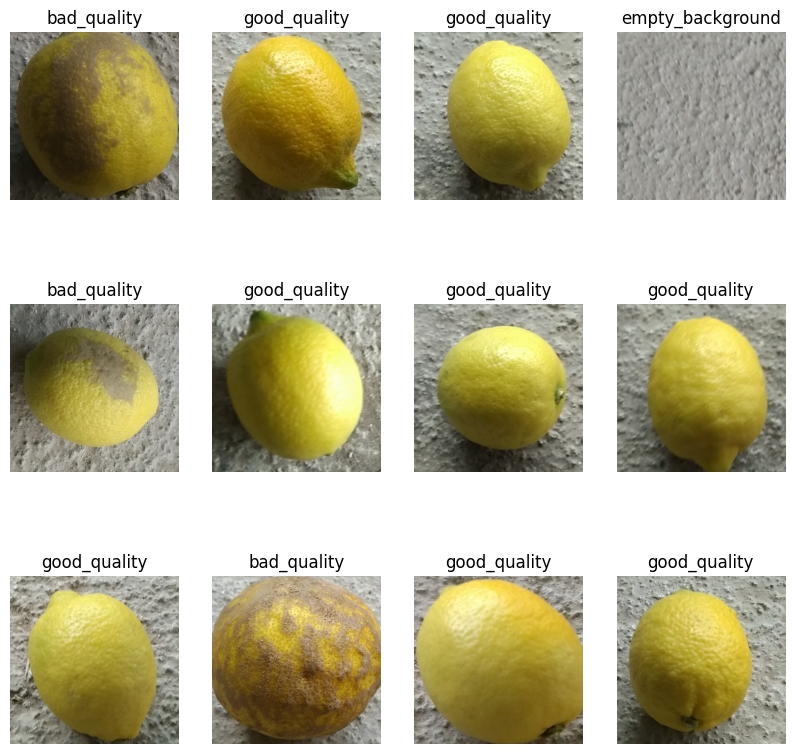

In [25]:
# perform data visualization
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Preprocess Data | Proses Awal Data

In [26]:
# split data
def split_dataset(dataset, train_split= 0.8, test_split= 0.1, val_split= 0.1, shuffle=True, shuffle_size = 10000):
  assert (train_split+test_split+val_split) == 1
  ds_size = len(dataset)

  if shuffle:
    data = dataset.shuffle(shuffle_size, seed=12)

  train_size = int(ds_size*train_split)
  val_size = int(ds_size*val_split)

  train_ds = dataset.take(train_size)
  val_ds = dataset.skip(train_size).take(val_size)
  test_ds = dataset.skip(train_size).skip(val_size)

  return train_ds, test_ds, val_ds

In [27]:
train_ds, test_ds, val_ds = split_dataset(dataset)
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1./299),
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [30]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
channel = 3
n_classes = 3

# Model Training | Pelatihan Model

Sesuai tujuan penelitian dan karakteristik data, 1 kelas algoritma CNN dari Tensorflow dipilih untuk dilatih dalam eksperimen dengan 4 Layer. Berikut adalah  algoritma dan layernya yang saya gunakan:

###* Sequential
- Conv2D
- MaxPooling2D
- Dense
- Flatten

In [31]:
# build model
## set model type
input_shape = (batch_size, image_size, image_size, channel)
model = tf.keras.models.Sequential([
    resize_and_rescale,
    ## add layers
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

d:\PROJECT\Capstone-skilvul_SmartLemonInsight\TFenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 300, 300, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 298, 298, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 149, 149, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 147, 147, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 73, 73, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 71, 71, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 35, 35, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 33, 33, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 16, 16, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 14, 14, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 5, 5, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# compile model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy']
    )

In [34]:
# fit / run model
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data = val_ds,
    verbose = 1,
    epochs = 30
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5763 - loss: 0.7886 - val_accuracy: 0.7634 - val_loss: 0.5072
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8074 - loss: 0.4285 - val_accuracy: 0.8438 - val_loss: 0.3736
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8594 - loss: 0.3197 - val_accuracy: 0.9464 - val_loss: 0.2461
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9253 - loss: 0.2184 - val_accuracy: 0.9554 - val_loss: 0.1447
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9407 - loss: 0.1515 - val_accuracy: 0.8750 - val_loss: 0.2754
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9447 - loss: 0.1474 - val_accuracy: 0.9777 - val_loss: 0.1051
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9664 - loss: 0.0908 - val_accuracy: 0.9866 - val_loss: 0.0511
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9733 - loss: 0.0756 - val_accuracy: 0.9420 - val_loss:

# Model Evaluation | Evaluasi Model

In [35]:
# evaluate model
scores = model.evaluate(test_ds)
scores

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - accuracy: 0.9965 - loss: 0.0175


[0.016232667490839958, 0.9965277910232544]

Text(0.5, 1.0, 'Training and Validation Loss')

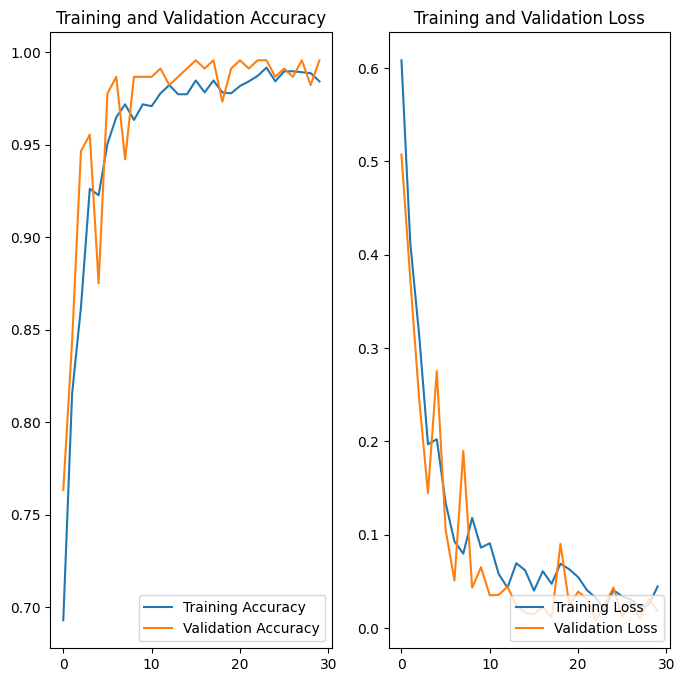

In [36]:
#report evaluasi dan training
epochs = 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

# Model Selection | Pemilihan Model

Berdasarkan hasil evaluasi ....., diputuskan untuk memilih model ..

In [38]:
# save model
model.save ('modelLemon.hdf5')

first image to predict
actual label good_quality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
predicted label good_quality


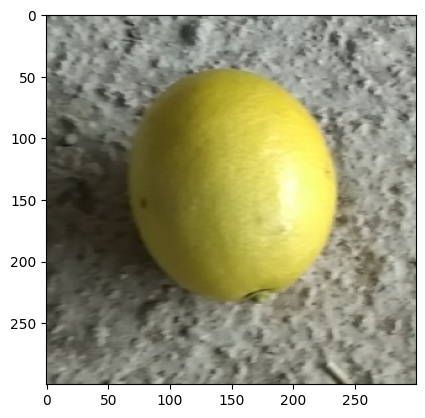

In [41]:
# testingModel (dengan input yang telah ditraining)
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label", class_names[first_label])
  batch_prediction = model.predict(images_batch)
  print("predicted label", class_names[np.argmax(batch_prediction[0])])

In [2]:
# Testing model (dengan input diluar dataset)
in_img = tf.keras.preprocessing.image.load_img("istockphoto-1445053718-170667a.jpg", target_size=(300, 300)) #masukan path gambar kesini
newImg = tf.keras.preprocessing.image.img_to_array(in_img)
newImg = np.expand_dims(newImg, axis=0)
prediksi = model.predict(newImg)
if prediksi[0][0] > 0.5:
    print("Lemon with bad quality")
elif prediksi[0][1] > 0.5:
    print("Lemon not detected")
else:
    print ("Lemon with good quality")
plt.imshow(in_img)

NameError: name 'tf' is not defined

# Conclusion | Kesimpulan

1. Dataset yang kami gunakan yaitu memiliki 3 class (good_quality, bad_quality dan empty_background). Ketiga class tersebut digunakan untuk menjadi label yang dapat menentukan QC dari buah lemon
2. alasan mengapa kami menggunakan CNN dari TensorFlow untuk menentukan kualitas buah lemon:
    1. CNN telah terbukti sangat efektif dalam tugas pengolahan gambar, termasuk klasifikasi objek dan deteksi cacat.
    2. CNN mampu mengekstrak fitur kompleks dari gambar buah lemon, seperti tekstur, warna, dan bentuk, yang sulit diidentifikasi secara manual.
    3. CNN memungkinkan untuk menentukan kualitas buah lemon dengan tingkat akurasi yang tinggi, bahkan untuk buah lemon yang memiliki variasi bentuk, warna, dan tekstur.

   Berikut adalah model algoritma dan layer yang digunakan pada training model yang telah kami lakukan:
### Sequential
  - Conv2D
  - MaxPooling2D
  - Dense
  - Flatten

  Kemudian kami menggunakan ADAM (Adaptive Moment Estimation) sebagai optimizer pada saat compiling model dikarenakan ADAM memiliki efisiensi yang tinggi dan kinerja yang baik jika digunakan sebagai optimizer pada saat copiling model.
3. Metrik yang digunakan sebagai tolak ukur keberhasilan model adalah Akurasi (Accuracy). Hal ini diputuskan karena akurasi merupakan metrik paling dasar yang menghitung persentase prediksi yang benar dari suatu model dan akurasi yang tinggi menunjukkan bahwa model dapat memprediksi kualitas buah lemon dengan tepat.Iterasi yang digunakan adalah sebanyak 30x (30 epoch), dan didapatkan score model yang baik yaitu dengan nilai loss : **00.171%** dan accuracy : **98.96%**.


In [44]:
#model structure
tf.keras.utils.plot_model(model, to_file='complex_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
